1. **Business Problem & Data Understanding**

### **Background**

Travel insurance telah menjadi bagian yang penting dalam travelling di masa ini. Kesadaran akan meningkatnya risiko ketika travelling seperti kecelakaan, sakit, atau kehilangan barang membuat permintaan akan insurance selama travelling meningkat. Salah satu aspek utama dari layanan insurance adalah kemampuannya untuk mengelola klaim dengan cepat dan efisien.

Klaim asuransi merupakan proses penting yang digunakan pemegang polis untuk mengajukan kompensasi atau kerugian atau kerusakan yang terjadi selama perjalanan yang ditanggung oleh polis asuransi. Hal ini dapat mencakup mulai dari perawatan medis hingga pembatalan travelling secara mendadak. Maka kemampuan perusahaan untuk mengelola klaim sangat penting

Target :

0 : Did not File a Claim

1 : File a Claim

### **Problem Statement**

Dalam  travel insurance, tantangan utama yang dihadapi adalah menentukan apakah seorang akan mengajukan klaim insurance atau tidak ketika situasi darurat terjadi. Hal ini memerlukan penilaian yang akurat terhadap keinginan dan kebutuhannya serta kemampuan untuk menyediakan layanan dan bantuan yang tepat pada waktu yang tepat. Oleh karena itu permasalahan utama adalah bagaimana mengidentifikasi dan memahami faktor-faktor yang mempengaruhi keputusan seseorang untuk mengajukan klaim travel insurance, sehingga memungkinkan perusahaan asuransi untuk membuat strategi dan proses yang lebih efektif dalam menangani klaim tersebut

### **Goals**

Membuat prediktive model yang dapat memperkirakan apakah sesorang akan mengajukan klaim asuransi atau tidak selama periode tertentu.

### **Analytic Approach** 

1. Analisis Data untuk Identifikasi Pola:
   
   - Mengumpulkan dan menganalisis data pelanggan secara historis, termasuk informasi tentang klaim asuransi yang diajukan dan yang tidak diajukan.
   
   - Memanfaatkan teknik analisis data seperti analisis statistik deskriptif, analisis korelasi, dan visualisasi data untuk mengidentifikasi pola atau perbedaan perilaku dan karakteristik antara pemegang polis yang   mengajukan klaim dan yang tidak.

2. Predictive Model Development:
   
   - Membangun predictive models menggunakan machine learning seperti logistic regression, decision trees, atau ensemble algorithms seperti Random Forest.
   
   - Melatih model menggunakan data historis untuk memprediksi kemungkinan dari pemegang polis mengajukan klaim atau tidak dimasa mendatang.

3. Model Validation dan Evaluation:
   
   - Menggunakan evaluation metrics seperti accuracy, precision, recall, dan area under the curve (AUC) untuk menilai kinerja model.
   
   - Memvalidasi model menggunakan cross-validation teknik untuk memastikan generalisasi yang baik untuk data baru.

4. Implementation dan Optimization:
   
   - Melakukan Implementasi model deteksi ke sistem informasi perusahaan untuk mendukung pengambilan keputusan.
   
   - Melakukan optimalisasi model secara berkala dengan memperbarui data pelanggan dan menyesuaikan parameter model untuk meningkatkan prediksi kinerja.

### **Evaluation Metrics**

- TP: Model memprediksi pelanggan melakukan klaim dan benar melakukan klain.
    
- TN: Model memprediksi pelanggan tidak melakukan klaim dan benar tidak melakukan klaim.
    
- FP: Model memprediksi pelanggan melakukan klaim tetapi malah tidak melakukan klaim.
    
- FN: Model memprediksi pelanggan tidak melakukan klaim tetapi malah melakukan klaim.

Ada 2 jenis tpe error:

- Tipe 1 : **False Positive**

    Konsekuensi: : pemborosan waktu, sumber daya, dan kinerja perusahaan dalam menangani klaim asuransi yang sebenarnya tidak diperlukan.

- Tipe 2 : **False Negative**

    Konsekuensi: penurunan kualitas layanan asuransi karena pemegang polis yang sebenarnya berhak menerima klaim tidak mendapatkannya. Hal ini dapat mengakibatkan ketidakpuasan pelanggan, hilangnya kepercayaan, dan bahkan dampak finansial yang serius bagi pemegang polis yang terdampak oleh kejadian yang tidak ditanggung oleh asuransi

Berdasarkan akibat di atas, upaya yang akan  dilakukan adalah mengembangkan model deteksi yang dapat meminimalkan tingkat Fales Negatif.

Dalam meminimalkan false negatif, fokus utamanya adalah **Recall Score**. Recall score akan mengukur kemampuan model untuk mengidentifikasi semua kasus True positive.

Dengan menggunakan Recall Score sebagai metrik utama, tujuan utama model ini adalah untuk memastikan bahwa sebanyak mungkin True Positive terdeteksi oleh model. Ini akan membantu meminimalkan jumlah False Negative , yang pada gilirannya akan mengurangi risiko penurunan kualitas layanan asuransi dan meningkatkan kepuasan pelanggan.

### **Data Understanding**

Masalah yang perlu diselesaikan adalah bagaimana agar efisien dalam menangani klaim asuransi melalui pemahaman pola pengajuan klaim. Dengan cara menganalisis kumpulan data yang mencakup informasi historis tentang pengguna asuransi yang telah mengajukan klaim, tujuan utamanya adalah mengidentifikasi faktor-faktor yang memengaruhi keputusan pengguna untuk mengajukan klaim. Fokusnya adalah pada peningkatan kemampuan perusahaan untuk memprediksi siapa yang mungkin mengajukan klaim, sehingga memungkinkan peningkatan respons yang tepat waktu

### **Features Information**

| Features              | Description                                            | Data Type |
|-----------------------|--------------------------------------------------------|-----------|
| Agency                | Name of the agency.                                    | object    |
| Agency Type           | Type of travel insurance agency.                       | object    |
| Distribution Channel  | Distribution channel of the travel insurance agency.  | object    |
| Product Name          | Name of the travel insurance product.                  | object    |
| Gender                | Gender of the insured.                                 | object    |
| Duration              | Duration of the travel.                                | int64     |
| Destination           | Destination of the travel.                             | object    |
| Net Sales             | Total sales amount of the travel insurance policy.     | float64   |
| Commission (in value) | Commission received for the travel insurance agency.   | float64   |
| Age                   | Age of the insured.                                    | int64     |
| **Claim**             | **Claim status (Target)**                              | object    |

## **2. Data Preparation**

#### **Import Library**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### **Dataset**

In [4]:
df = pd.read_csv('data_travel_insurance.csv')
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


#### **Dataset Description**

In [5]:
dataDesc=[]
for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/len(df))*100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(dataDesc, columns=[
    'Data Features',
    'Data Types',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
])

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,Agency,object,0,0.00,16,"[KML, ADM]"
1,Agency Type,object,0,0.00,2,"[Travel Agency, Airlines]"
2,Distribution Channel,object,0,0.00,2,"[Online, Offline]"
3,Product Name,object,0,0.00,26,"[24 Protect, Travel Cruise Protect]"
4,Gender,object,31647,71.39,2,"[nan, F]"
5,Duration,int64,0,0.00,437,"[384, 382]"
6,Destination,object,0,0.00,138,"[SWITZERLAND, AUSTRALIA]"
7,Net Sales,float64,0,0.00,1006,"[172.25, 14.4]"
8,Commision (in value),float64,0,0.00,915,"[44.5, 30.25]"
9,Age,int64,0,0.00,89,"[8, 66]"


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,44328.0,49.424292,109.153961,-1.0,9.0,22.0,53.00,4881.0
Net Sales,44328.0,40.550948,48.661970,-357.5,18.0,26.5,48.00,810.0
Commision (in value),44328.0,9.707692,19.625637,0.0,0.0,0.0,11.55,283.5
Age,44328.0,39.925600,13.954926,0.0,35.0,36.0,43.00,118.0


Insight:


- Terdapat data Null sebanyak 31.647 pada kolom gender

- Nilai maksimum pada duration ada di angka 4.881 ini bisa kita identifikasi sebagai outlier

Jenis Numerik:
- Duration
- Net Sales
- Commision
- Age

Jenis Kategorikal:
- Agency
- Agency Type
- Distribution Channel
- Product Name
- Gender
- Destination
- Claim



## **3. EDA (Exploratory Data Analysis)**

### **Numerical**

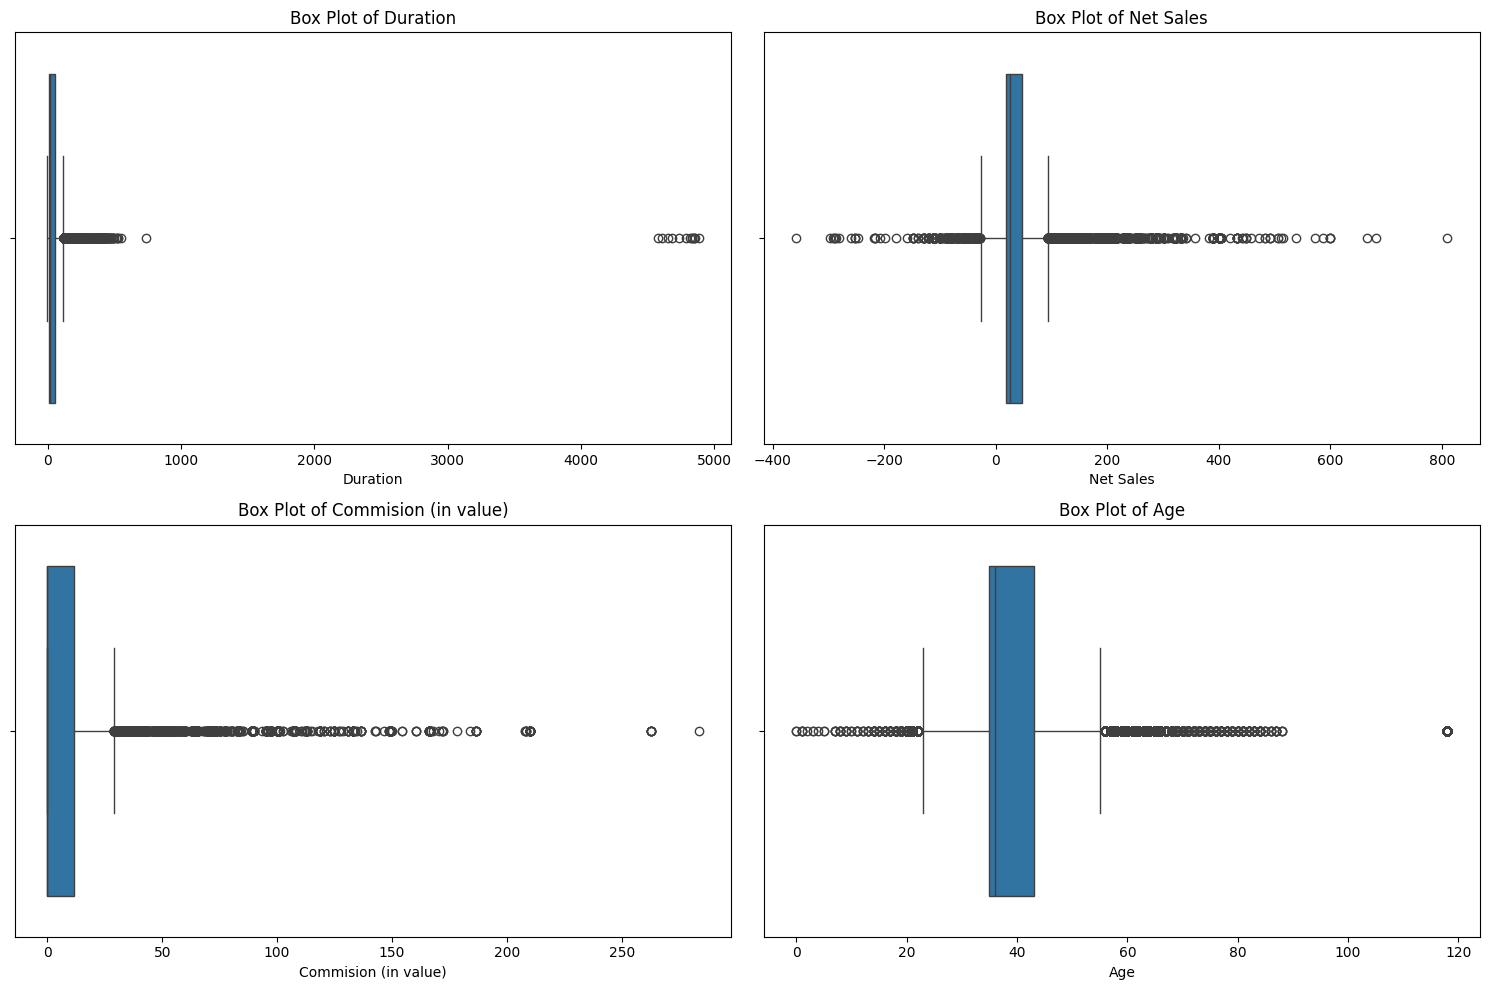

In [7]:
# Membuat box plots 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Duration
sns.boxplot(data=df, x='Duration', ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Duration')

# Net Sales
sns.boxplot(data=df, x='Net Sales', ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Net Sales')

# Commision (in value)
sns.boxplot(data=df, x='Commision (in value)', ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Commision (in value)')

# Age
sns.boxplot(data=df, x='Age', ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Age')

plt.tight_layout()
plt.show()

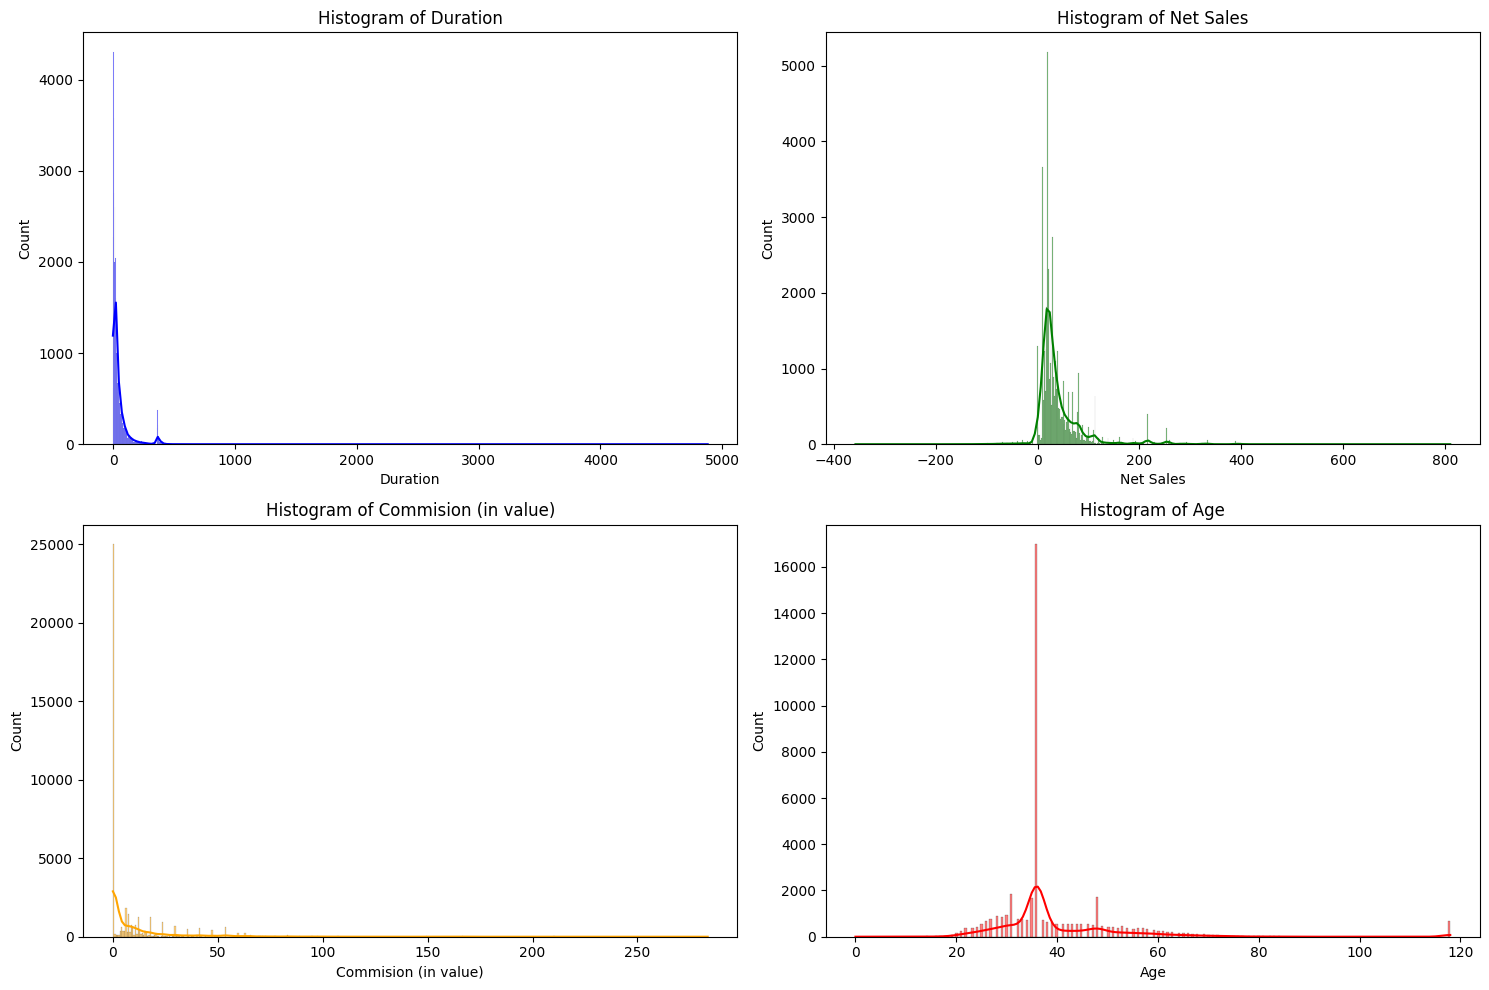

In [8]:
# Mebuat histograms 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Duration
sns.histplot(data=df, x='Duration', ax=axes[0, 0], kde=True, color='blue', alpha=0.5)
axes[0, 0].set_title('Histogram of Duration')

# Net Sales
sns.histplot(data=df, x='Net Sales', ax=axes[0, 1], kde=True, color='green', alpha=0.5)
axes[0, 1].set_title('Histogram of Net Sales')

# Commision (in value)
sns.histplot(data=df, x='Commision (in value)', ax=axes[1, 0], kde=True, color='orange', alpha=0.5)
axes[1, 0].set_title('Histogram of Commision (in value)')

# Age
sns.histplot(data=df, x='Age', ax=axes[1, 1], kde=True, color='red', alpha=0.5)
axes[1, 1].set_title('Histogram of Age')

plt.tight_layout()
plt.show()

#### **Cek Korelasi antar Numerical Features**

In [9]:
correlation_matrix = df[['Duration', 'Net Sales', 'Commision (in value)', 'Age']].corr()
correlation_matrix

,Duration,Net Sales,Commision (in value),Age
Duration,1.000000,0.392636,0.315283,0.005042
Net Sales,0.392636,1.000000,0.647442,0.039393
Commision (in value),0.315283,0.647442,1.000000,0.118546
Age,0.005042,0.039393,0.118546,1.000000


Tabel menunjukkan matriks korelasi antara : Durasi, Penjualan Bersih, Komisi (dalam nilai), dan Usia.

- Duration memiliki korelasi positif dengan Net Sales (0,392) dan Commision (dalam nilai) (0,315), yang menunjukkan bahwa durasi perjalanan yang lebih lama cenderung menghasilkan Net Sales dan Commission yang lebih tinggi.

- Net sales memiliki korelasi positif yang kuat dengan Commision (0,647), yang menunjukkan bahwa Net sales yang lebih tinggi biasanya menghasilkan jumlah commision yang lebih tinggi.

- Age memiliki korelasi yang sangat lemah dengan fitur lainnya, yang menunjukkan sedikit atau tidak ada hubungan antara age dan variabel numerik lainnya.

### **Ketgorikal**

#### **Categorical Features**

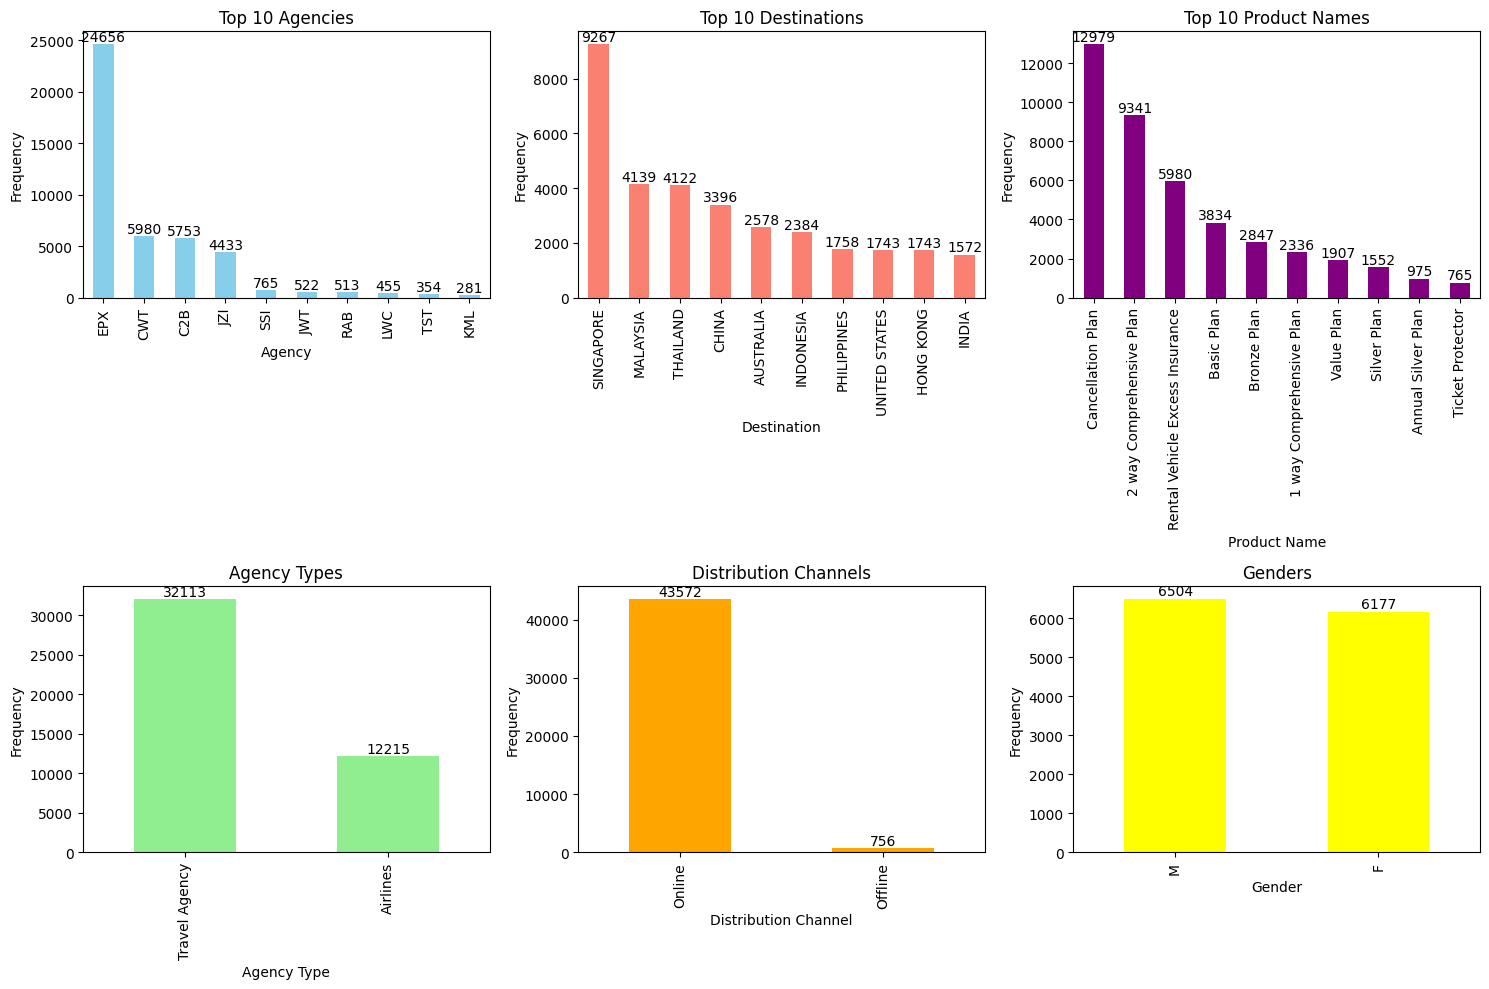

In [10]:
# Top 10 data dari kolom Agency, Destination, and Product Name
top_agency = df['Agency'].value_counts().head(10)
top_destination = df['Destination'].value_counts().head(10)
top_product_name = df['Product Name'].value_counts().head(10)

# Membuat subplots untuk kolom Agency, Destination, and Product Name
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
top_agency.plot(kind='bar', color='skyblue')
plt.title('Top 10 Agencies')
plt.xlabel('Agency')
plt.ylabel('Frequency')
for i, v in enumerate(top_agency):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.subplot(2, 3, 2)
top_destination.plot(kind='bar', color='salmon')
plt.title('Top 10 Destinations')
plt.xlabel('Destination')
plt.ylabel('Frequency')
for i, v in enumerate(top_destination):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.subplot(2, 3, 3)
top_product_name.plot(kind='bar', color='purple')
plt.title('Top 10 Product Names')
plt.xlabel('Product Name')
plt.ylabel('Frequency')
for i, v in enumerate(top_product_name):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

# Mengambil data dari Agency Type, Distribution Channel, and Gender
agency_type_counts = df['Agency Type'].value_counts()
distribution_counts = df['Distribution Channel'].value_counts()
gender_counts = df['Gender'].value_counts()

# Membuat subplots untuk Agency Type, Distribution Channel, and Gender
plt.subplot(2, 3, 4)
agency_type_counts.plot(kind='bar', color='lightgreen')
plt.title('Agency Types')
plt.xlabel('Agency Type')
plt.ylabel('Frequency')
for i, v in enumerate(agency_type_counts):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.subplot(2, 3, 5)
distribution_counts.plot(kind='bar', color='orange')
plt.title('Distribution Channels')
plt.xlabel('Distribution Channel')
plt.ylabel('Frequency')
for i, v in enumerate(distribution_counts):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.subplot(2, 3, 6)
gender_counts.plot(kind='bar', color='yellow')
plt.title('Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
for i, v in enumerate(gender_counts):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Insight**

1. Agensi:

- EPX adalah agensi teratas dengan jumlah polis tertinggi, hampir empat kali lipat dari agensi kedua (CWT).

- Sebagian besar polis dibeli melalui agensi besar seperti EPX, CWT, C2B dan JZI.

2. Destinasi:

- Singapura adalah destinasi teratas, diikuti oleh TMalaysia dan Thailand.

- Destinasi terpopuler adalah negara-negara Asia

3. Nama Produk:

- Cancellation plan adalah produk terpopuler, diikuti oleh 2 way comprehensive plan dan Rental vehicle excess insurance.

- Produk-produk ini dapat menunjukkan kebutuhan yang paling umum di antara pelanggan.

4. Jenis Agensi:

- Lebih banyak polis dibeli melalui agen perjalanan daripada maskapai penerbangan.

5. Saluran Distribusi:

- Pembelian daring mungkin lebih populer karena kenyamanan dan aksesibilitasnya bagi sebagian besar pelanggan di era digital ini.

6. Jenis Kelamin:

- Ada sedikit perbedaan dalam jumlah polis yang dibeli oleh pria dan wanita, dengan jumlah pria sedikit lebih banyak daripada wanita.

### **Cek Cardinality**

In [11]:
cardinality_check = df.select_dtypes(include=['object']).nunique()

print(cardinality_check)

Agency                   16
Agency Type               2
Distribution Channel      2
Product Name             26
Gender                    2
Destination             138
Claim                     2
dtype: int64


The cardinality results provide information about the number of unique categories or levels within each categorical variable:

1. **Agency:** 
   - Ada 16 data unik, maka menggunakan binary encoding.

2. **Agency Type:** 
   - Hanya ada 2 data unik, maka menggunakan one-hot encoding.

3. **Distribution Channel:** 
   - Hanya ada 2 data unik, maka menggunakan one-hot encoding.

4. **Product Name:** 
   - Ada 26 data unik, maka menggunakan target encoding.

5. **Destination:** 
   - Ada 138 data unik, maka menggunakan target encoding.

6. **Age Range:** 
   - Ada 6 data unik, maka menggunakan label encoding.

## **4. Data Cleaning**

### **Mengubah Tipe Data ke Target Column**

In [12]:
df['Claim'] = np.where(df['Claim']=='Yes', 1, 0)
df['Claim'].value_counts()

Claim
0    43651
1      677
Name: count, dtype: int64

Interpretasi data yang diberikan adalah sebagai berikut:

- Ada 43.651 kasus klaim asuransi tidak diajukan (Klaim = 0).
- Ada 677 kasus klaim asuransi diajukan (Klaim = 1).

Hal ini menunjukkan bahwa kumpulan data tidak seimbang, dengan jumlah kasus klaim tidak diajukan jauh lebih besar dibandingkan dengan kasus klaim yang diajukan.

### **Missing Values**

#### **Import Library**

In [13]:
import missingno

<Axes: >

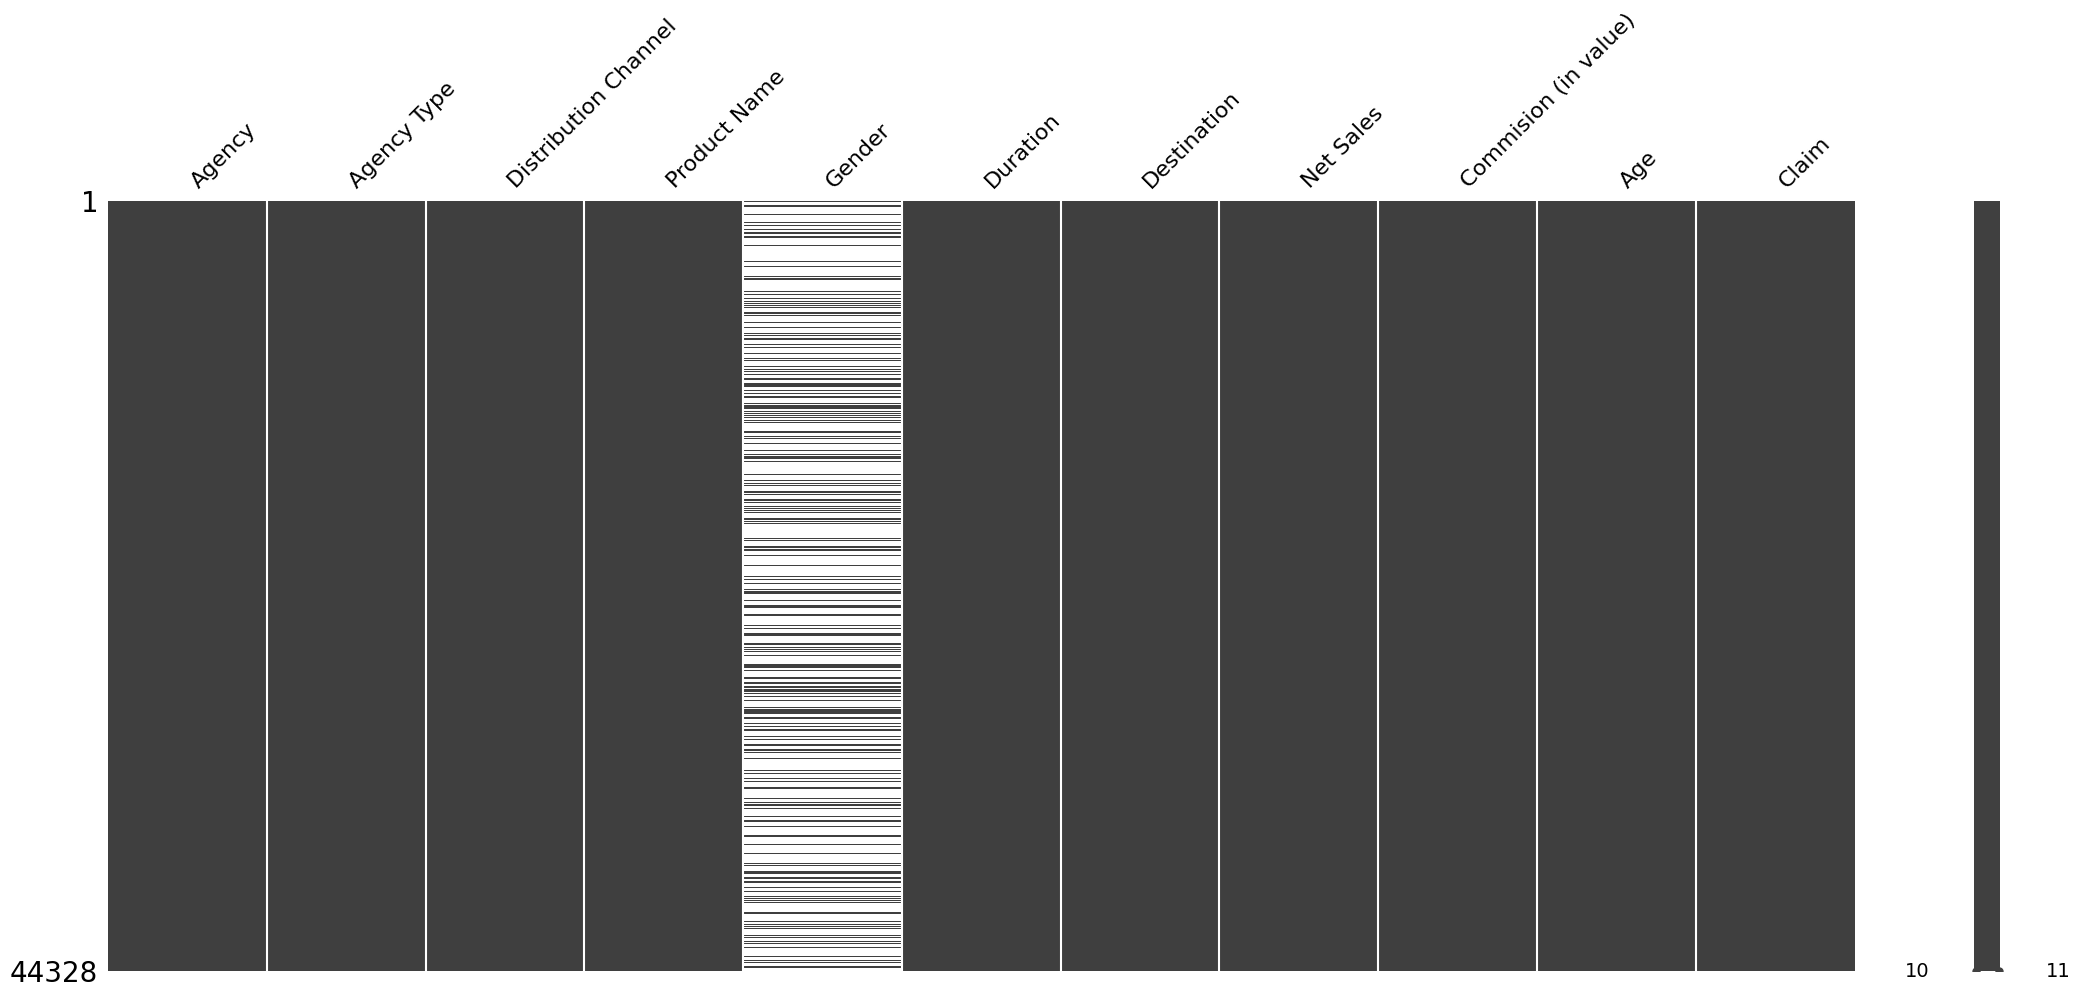

In [14]:
missingno.matrix(df)

In [15]:
df = df.drop(['Gender'], axis=1)
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,0
...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,1
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,0
44325,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,0
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,0


### **Duplicated Data**

In [16]:
df[df.duplicated()]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
331,EPX,Travel Agency,Online,Cancellation Plan,2,SINGAPORE,10.0,0.00,36,0
360,EPX,Travel Agency,Online,Cancellation Plan,6,MALAYSIA,10.0,0.00,36,0
473,EPX,Travel Agency,Online,Cancellation Plan,11,MALAYSIA,10.0,0.00,36,0
488,EPX,Travel Agency,Online,Cancellation Plan,2,SINGAPORE,10.0,0.00,36,0
636,EPX,Travel Agency,Online,1 way Comprehensive Plan,3,MALAYSIA,20.0,0.00,36,0
...,...,...,...,...,...,...,...,...,...,...
44309,EPX,Travel Agency,Online,2 way Comprehensive Plan,49,VIET NAM,20.0,0.00,36,0
44311,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,5,THAILAND,29.7,17.82,38,0
44313,EPX,Travel Agency,Online,Cancellation Plan,5,CHINA,14.0,0.00,36,0
44315,EPX,Travel Agency,Online,1 way Comprehensive Plan,5,THAILAND,20.0,0.00,36,0


In [17]:
# Drop data duplicates
df.drop_duplicates(inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

# Cek sisa duplicates
n_duplicates = df.duplicated().sum()

# Cek new shape DataFrame
new_shape = df.shape

# Output 
print("Number of duplicates:", n_duplicates)
print("New DataFrame shape:", new_shape)

Number of duplicates: 0
New DataFrame shape: (39324, 10)


### **Outliers**

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,39324.0,52.275989,113.404932,-1.0,11.0,25.0,57.00,4881.0
Net Sales,39324.0,42.202530,49.704030,-357.5,19.0,29.0,50.00,810.0
Commision (in value),39324.0,10.386189,20.345275,0.0,0.0,0.0,11.88,283.5
Age,39324.0,39.833054,13.225494,0.0,35.0,36.0,44.00,118.0
Claim,39324.0,0.017114,0.129699,0.0,0.0,0.0,0.00,1.0


#### Handling Outliers in `Duration` 

In [19]:
df['Duration'].describe().reset_index().set_index('index').loc[['count', 'mean', 'min', 'max']]

,Duration
index,
count,39324.000000
mean,52.275989
min,-1.000000
max,4881.000000


In [20]:
out_min_dur = df[['Duration']][(df['Duration'] <= 0)]

print('Number of data with the Duration < 0: ', len(out_min_dur))

Number of data with the Duration < 0:  36


In [21]:
out_max_dur = df[['Duration']][(df['Duration'] > 4000) & (df['Claim'] == 1)]

print('Number of Data with the Duration > 4000 and Claim = 1 : ', len(out_max_dur))

Number of Data with the Duration > 4000 and Claim = 1 :  0


Durasi di atas 4000 hari tidak memiliki klaim asuransi yang diajukan, oleh karena itu akan di dropped

In [22]:
df.drop(index=out_min_dur.index, inplace=True)
df.drop(df[df['Duration'] > 4000].index, inplace=True)

In [23]:
out_dur_0 = df[['Duration']][(df['Duration']>100) & (df['Claim']==0)]
out_dur_1 = df[['Duration']][(df['Duration']>100) & (df['Claim']==1)]

print('The number of data points with Duration > 100 and Claim = 0 : ',len(out_dur_0))
print('The number of data points with Duration > 100 and Claim = 1. : ',len(out_dur_1))

The number of data points with Duration > 100 and Claim = 0 :  4533
The number of data points with Duration > 100 and Claim = 1. :  177


#### Handling Outliers in `Net Sales`

In [24]:
df['Net Sales'].describe().reset_index().set_index('index').loc[['count', 'mean', 'min', 'max']]

,Net Sales
index,
count,39275.00000
mean,42.23696
min,-357.50000
max,810.00000


In [25]:
out_sales_neg = df[['Net Sales']][df['Net Sales'] < 0]

print('The number of data points with Net Sales < 0 : ',len(out_sales_neg))

The number of data points with Net Sales < 0 :  477


In [26]:
df.drop(index=out_sales_neg.index, inplace=True)

In [27]:
# Define function to identify outliers and calculate outlier percentage
def calculate_outlier_percentage(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    
    # Identify outliers
    outliers = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
    
    # Calculate outlier percentage
    outlier_count = len(outliers)
    total_count = len(data)
    outlier_percentage = (outlier_count / total_count) * 100
    
    # Check the distribution of claims among the outliers
    claim_distribution_outliers = outliers['Claim'].value_counts()
    
    return outlier_percentage, outlier_count, total_count, claim_distribution_outliers

# Calculate outlier statistics for 'Net Sales'
net_sales_outlier_percentage, net_sales_outlier_count, net_sales_total_count, net_sales_claim_distribution = calculate_outlier_percentage(df, 'Net Sales')

# Print outlier statistics along with explanations
print("Outlier Analysis for Net Sales:")
print(f"Outlier Percentage: {net_sales_outlier_percentage:.2f}%")
print(f"Number of Outliers: {net_sales_outlier_count}")
print(f"Total Number of Data Points: {net_sales_total_count}")
print("\nClaim Distribution Among Outliers:")
print(net_sales_claim_distribution)

Outlier Analysis for Net Sales:
Outlier Percentage: 8.29%
Number of Outliers: 3217
Total Number of Data Points: 38798

Claim Distribution Among Outliers:
Claim
0    3020
1     197
Name: count, dtype: int64


#### Handling Outliers in `Commision` 

In [28]:
df['Commision (in value)'].describe().reset_index().set_index('index').loc[['count', 'mean', 'min', 'max']]

,Commision (in value)
index,
count,38798.000000
mean,10.222267
min,0.000000
max,283.500000


In [29]:
# Calculate outlier statistics for 'Commision'
commision_outlier_percentage, commision_outlier_count, commision_total_count, commision_claim_distribution = calculate_outlier_percentage(df, 'Commision (in value)')

# Print outlier
print("Outlier Analysis for Commission:")
print(f"Outlier Percentage: {commision_outlier_percentage:.2f}%")
print(f"Number of Outliers: {commision_outlier_count}")
print(f"Total Number of Data Points: {commision_total_count}")
print("\nClaim Distribution Among Outliers:")
print(commision_claim_distribution)

Outlier Analysis for Commission:
Outlier Percentage: 10.00%
Number of Outliers: 3879
Total Number of Data Points: 38798

Claim Distribution Among Outliers:
Claim
0    3682
1     197
Name: count, dtype: int64


#### Handling Outliers in `Age` 

In [30]:
df['Age'].describe().reset_index().set_index('index').loc[['count', 'mean', 'min', 'max']]

,Age
index,
count,38798.000000
mean,39.810635
min,0.000000
max,118.000000


In [31]:
out_age = df[df['Age'] == 0]

print('Jumlah Data dengan Age = 0 : ',len(out_age))


Jumlah Data dengan Age = 0 :  1


In [32]:
df.drop(index=out_age.index, inplace=True)

## Menghapus outlier age yang bernilai 0 karena manusia tidak ada yang usianya 0

### **Data Cleaning Validation**

In [33]:
dataDesc=[]
for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/len(df))*100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(dataDesc, columns=[
    'Data Features',
    'Data Types',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
])

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,Agency,object,0,0.0,16,"[ART, TST]"
1,Agency Type,object,0,0.0,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.0,2,"[Offline, Online]"
3,Product Name,object,0,0.0,26,"[Annual Travel Protect Silver, Individual Comp..."
4,Duration,int64,0,0.0,421,"[242, 366]"
5,Destination,object,0,0.0,137,"[AUSTRIA, SERBIA]"
6,Net Sales,float64,0,0.0,883,"[151.0, 207.0]"
7,Commision (in value),float64,0,0.0,911,"[5.94, 15.28]"
8,Age,int64,0,0.0,88,"[64, 7]"
9,Claim,int32,0,0.0,2,"[0, 1]"


In [34]:
df.shape

(38797, 10)

## **5. Feature Engineering**

### **Binning**

- Babies : 0-1 years old

- Children : 2-10 years

- Teenager : 11-17 years old

- Young Adult : 18-30 years

- Adult : 30-60 years

- Senior Aged : ≥ 60 years

In [35]:

def bin_age(age):
    if age <= 1:
        return 'Babies'
    elif age <= 10:
        return 'Children'
    elif age <= 17:
        return 'Teenager'
    elif age <= 30:
        return 'Young Adult'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Senior Aged'


df['Age Range'] = df['Age'].apply(bin_age)
df['Age Range'].value_counts()

Age Range
Adult          30511
Young Adult     5855
Senior Aged     2341
Teenager          65
Children          21
Babies             4
Name: count, dtype: int64

In [36]:
df.drop(columns=['Age'], inplace=True)

#menghapus kolom age

- 1-4 months will correspond to 1-120 days.

- 5-8 months will correspond to 121-240 days.

- 9-12 months will correspond to 240-360 days.

- Over 12 months will correspond to durations exceeding 361 days.

In [37]:
bins = [0, 120, 240, 360,float('inf')]
labels = ['1-4 months', '5-8 months', '9-12 months', '>12 months']

df['Duration Category'] = pd.cut(df['Duration'], bins=bins, labels=labels)

In [38]:
# Hapus kolom 'Duration' dari DataFrame
df.drop(columns=['Duration'], inplace=True)

# Drop NaN values pada Duration Category
df.dropna(subset=['Duration Category'], inplace=True)

In [39]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Destination,Net Sales,Commision (in value),Claim,Age Range,Duration Category
0,C2B,Airlines,Online,Annual Silver Plan,SINGAPORE,216.0,54.00,0,Adult,>12 months
1,EPX,Travel Agency,Online,Cancellation Plan,MALAYSIA,10.0,0.00,0,Adult,1-4 months
2,JZI,Airlines,Online,Basic Plan,INDIA,22.0,7.70,0,Young Adult,1-4 months
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,UNITED STATES,112.0,0.00,0,Adult,1-4 months
4,C2B,Airlines,Online,Bronze Plan,SINGAPORE,16.0,4.00,0,Young Adult,1-4 months
...,...,...,...,...,...,...,...,...,...,...
39319,EPX,Travel Agency,Online,2 way Comprehensive Plan,CHINA,30.0,0.00,1,Adult,1-4 months
39320,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,AUSTRALIA,79.2,47.52,0,Adult,1-4 months
39321,TST,Travel Agency,Offline,Travel Cruise Protect,THAILAND,30.0,10.50,0,Adult,1-4 months
39322,EPX,Travel Agency,Online,2 way Comprehensive Plan,CHINA,36.0,0.00,0,Adult,1-4 months


### **Encoding**

| Feature            | Encoding/Scaling          |
|--------------------|-------------------|
| Agency             | Binary Encoding   |
| Agency Type        | One-Hot Encoding  |
| Distribution Channel | One-Hot Encoding |
| Product Name       | Binary Encoding   |
| Destination        | Binary Encoding   |
| Age Range          | Ordinal Encoding  |
| Duration           | Ordinal Encoding  |
| Net Sales          | Robust Scaling  |
| Commision           | Robust Scaling  |

### **Setup Pipeline**

In [40]:
# import library
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate

In [41]:

binary_cols = ['Agency', 'Product Name', 'Destination']

one_hot_cols = ['Agency Type', 'Distribution Channel']

ordinal_cols = ['Age Range', 'Duration Category']

ordinal_categories = [['Babies', 'Children', 'Teenager', 'Young Adult', 'Adult', 'Senior Aged'],
                      ['1-4 months', '5-8 months', '9-12 months', '>12 months']]

transformers = [
    ('binary_encoder', BinaryEncoder(), binary_cols),
    ('one_hot_encoder', OneHotEncoder(), one_hot_cols),
    ('ordinal_encoder', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
    ('robust_scaler', RobustScaler(), ['Net Sales', 'Commision (in value)'])
]

preprocessor = ColumnTransformer(transformers)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [42]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary_encoder',
                                                  BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('ordinal_encoder',
                                                  OrdinalEncoder(categories=[['Babies',
                                                                              'Children',
                                                                              'Teenager',
                                                                              'Young '
                                                                              'Adult',
                                                                              'Adult',
                                                                              'Senior '
                                                                              'Aged'],
                                                                             ['1-4 '
                                                                              'months',
                                                                              '5-8 '
                                                                              'months',
                                                                              '9-12 '
                                                                              'months',
                                                                              '>12 '
                                                                              'months']]),
                                                  ['Age Range',
                                                   'Duration Category']),
                                                 ('robust_scaler',
                                                  RobustScaler(),
                                                  ['Net Sales',
                                                   'Commision (in value)'])]))])

## **6. Modelling Analytics**

### **Split Data**

In [43]:
# Memisahkan fitur dan target
X = df[['Agency', 'Product Name', 'Destination','Agency Type', 'Distribution Channel','Age Range','Duration Category', 'Net Sales', 'Commision (in value)']]  
y = df['Claim']

# Memisahkan data ke training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    stratify=y,
                                                    random_state=42)

#### **Train Data**

In [44]:
# import library

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss

from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import GridSearchCV




In [45]:
# List of models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(criterion='gini'),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Ada Boost': AdaBoostClassifier(),
    'Ridge Classifier': RidgeClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Gradient Boosting Classifier': GradientBoostingClassifier()
}

In [46]:
# A dictionary containing metrics used
metrics = {'balanced_accuracy': 'balanced_accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1'}

# List to store result
test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []

# Iterate over all models and cross-validate method
for name_model,model in models.items():
    crossval = StratifiedKFold(n_splits=5)
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    list_model.append(name_model)
    scores = cross_validate(pipeline, X_train, y_train, cv=crossval, scoring=metrics)
    test_accuracy_arr.append(round(scores['test_balanced_accuracy'].mean() * 100, 2))
    test_precision_arr.append(round(scores['test_precision'].mean() * 100, 2))
    test_recall_arr.append(round(scores['test_recall'].mean() * 100, 2))
    test_f1_arr.append(round(scores['test_f1'].mean() * 100, 2))

# Create a dataframe for all of the benchmarking output
model_bench_train = pd.DataFrame({
    'Model': list_model,
    'Train Accuracy': test_accuracy_arr,
    'Train Precision': test_precision_arr,
    'Train Recall': test_recall_arr,
    'Train F1': test_f1_arr
})

model_bench_train.sort_values('Train Recall', ascending=False)

c:\Users\Atik Dharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Atik Dharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Atik Dharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

,Model,Train Accuracy,Train Precision,Train Recall,Train F1
7,Linear Discriminant Analysis,55.58,13.14,12.64,12.85
2,Decision Tree,50.75,8.26,1.86,2.97
3,Random Forest,50.47,12.91,1.12,1.98
1,KNN,50.17,12.86,0.37,0.71
4,XGBoost,50.18,23.33,0.37,0.72
0,Logistic Regression,50.00,0.00,0.00,0.00
5,Ada Boost,50.00,0.00,0.00,0.00
6,Ridge Classifier,50.00,0.00,0.00,0.00
8,Gradient Boosting Classifier,49.99,0.00,0.00,0.00


#### **Test Data**

In [47]:
# List to store result
test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []

# Iterate over all models and cross-validate method
for name_model, model in models.items():
    crossval = StratifiedKFold(n_splits=5)
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    list_model.append(name_model)
    scores = cross_validate(pipeline, X_test, y_test, cv=crossval, scoring=metrics)
    test_accuracy_arr.append(round(scores['test_balanced_accuracy'].mean() * 100, 2))
    test_precision_arr.append(round(scores['test_precision'].mean() * 100, 2))
    test_recall_arr.append(round(scores['test_recall'].mean() * 100, 2))
    test_f1_arr.append(round(scores['test_f1'].mean() * 100, 2))

# Create a dataframe for all of the benchmarking output
model_bench_test = pd.DataFrame({
    'Model': list_model,
    'Test Accuracy': test_accuracy_arr,
    'Test Precision': test_precision_arr,
    'Test Recall': test_recall_arr,
    'Test F1': test_f1_arr
})

model_bench_test.sort_values('Test Recall', ascending=False)

c:\Users\Atik Dharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Atik Dharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Atik Dharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

,Model,Test Accuracy,Test Precision,Test Recall,Test F1
7,Linear Discriminant Analysis,61.50,17.37,25.19,20.49
2,Decision Tree,51.11,6.99,2.96,4.16
1,KNN,51.06,6.67,2.22,3.33
5,Ada Boost,50.69,20.00,1.48,2.76
0,Logistic Regression,50.36,20.00,0.74,1.43
4,XGBoost,50.30,5.00,0.74,1.29
3,Random Forest,49.80,0.00,0.00,0.00
6,Ridge Classifier,50.00,0.00,0.00,0.00
8,Gradient Boosting Classifier,49.95,0.00,0.00,0.00


In [48]:
pd.merge(model_bench_train, model_bench_test, on='Model').sort_values('Test Recall', ascending=False)

,Model,Train Accuracy,Train Precision,Train Recall,Train F1,Test Accuracy,Test Precision,Test Recall,Test F1
7,Linear Discriminant Analysis,55.58,13.14,12.64,12.85,61.50,17.37,25.19,20.49
2,Decision Tree,50.75,8.26,1.86,2.97,51.11,6.99,2.96,4.16
1,KNN,50.17,12.86,0.37,0.71,51.06,6.67,2.22,3.33
5,Ada Boost,50.00,0.00,0.00,0.00,50.69,20.00,1.48,2.76
0,Logistic Regression,50.00,0.00,0.00,0.00,50.36,20.00,0.74,1.43
4,XGBoost,50.18,23.33,0.37,0.72,50.30,5.00,0.74,1.29
3,Random Forest,50.47,12.91,1.12,1.98,49.80,0.00,0.00,0.00
6,Ridge Classifier,50.00,0.00,0.00,0.00,50.00,0.00,0.00,0.00
8,Gradient Boosting Classifier,49.99,0.00,0.00,0.00,49.95,0.00,0.00,0.00


#### **Approach Method Applied to Train Data**

##### **Imbalanced Dataset Handling with SMOTE Method**

In [49]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# List to store result
test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []

# Iterate over all models and cross-validate method
for name_model,model in models.items():
    crossval = StratifiedKFold(n_splits=5)
    
    # Use ImbPipeline from imbalanced-learn to properly apply SMOTE
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('resampler', smote),  # Add SMOTE as a preprocessing step
        ('classifier', model)
    ])

    list_model.append(name_model)
    
    scores = cross_validate(pipeline, X_train, y_train, cv=crossval, scoring=metrics, error_score='raise')
    test_accuracy_arr.append(round(scores['test_balanced_accuracy'].mean() * 100, 2))
    test_precision_arr.append(round(scores['test_precision'].mean() * 100, 2))
    test_recall_arr.append(round(scores['test_recall'].mean() * 100, 2))
    test_f1_arr.append(round(scores['test_f1'].mean() * 100, 2))

# Create a dataframe for all of the benchmarking output
model_bench_train_smote = pd.DataFrame({
    'Model': list_model,
    'Train Accuracy': test_accuracy_arr,
    'Train Precision': test_precision_arr,
    'Train Recall': test_recall_arr,
    'Train F1': test_f1_arr,
    'Imbalanced Method': pd.Series(["SMOTE"] * len(list_model)) 
}).sort_values('Train Recall', ascending=False)

model_bench_train_smote

c:\Users\Atik Dharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Atik Dharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

,Model,Train Accuracy,Train Precision,Train Recall,Train F1,Imbalanced Method
0,Logistic Regression,75.37,5.72,71.58,10.59,SMOTE
6,Ridge Classifier,74.75,5.96,68.60,10.97,SMOTE
7,Linear Discriminant Analysis,74.75,5.96,68.60,10.96,SMOTE
5,Ada Boost,73.56,7.04,61.54,12.63,SMOTE
8,Gradient Boosting Classifier,72.58,7.47,57.82,13.23,SMOTE
4,XGBoost,66.43,7.28,42.38,12.43,SMOTE
2,Decision Tree,61.06,8.80,27.14,13.26,SMOTE
3,Random Forest,61.08,8.87,27.14,13.34,SMOTE
1,KNN,52.55,4.03,8.74,5.50,SMOTE


##### **Imbalanced Dataset Handling with Random Over Sampling**

In [50]:
random_over_sampler = RandomOverSampler(random_state=42)

# List to store result
test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []

# Iterate over all models and cross-validate method
for name_model,model in models.items():
    crossval = StratifiedKFold(n_splits=5)
    
    # Use ImbPipeline from imbalanced-learn to properly apply SMOTE
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('resampler', random_over_sampler),  
        ('classifier', model)
    ])

    list_model.append(name_model)
    
    scores = cross_validate(pipeline, X_train, y_train, cv=crossval, scoring=metrics, error_score='raise')
    test_accuracy_arr.append(round(scores['test_balanced_accuracy'].mean() * 100, 2))
    test_precision_arr.append(round(scores['test_precision'].mean() * 100, 2))
    test_recall_arr.append(round(scores['test_recall'].mean() * 100, 2))
    test_f1_arr.append(round(scores['test_f1'].mean() * 100, 2))

# Create a dataframe for all of the benchmarking output
model_bench_train_ros = pd.DataFrame({
    'Model': list_model,
    'Train Accuracy': test_accuracy_arr,
    'Train Precision': test_precision_arr,
    'Train Recall': test_recall_arr,
    'Train F1': test_f1_arr,
    'Imbalanced Method': pd.Series(["Random Over Sampler"] * len(list_model)) 
}).sort_values('Train Recall', ascending=False)

model_bench_train_ros

c:\Users\Atik Dharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Atik Dharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

,Model,Train Accuracy,Train Precision,Train Recall,Train F1,Imbalanced Method
0,Logistic Regression,75.37,5.89,70.65,10.87,Random Over Sampler
5,Ada Boost,74.74,5.94,68.79,10.93,Random Over Sampler
6,Ridge Classifier,74.64,6.17,67.30,11.31,Random Over Sampler
7,Linear Discriminant Analysis,74.63,6.17,67.30,11.30,Random Over Sampler
8,Gradient Boosting Classifier,73.48,5.75,66.19,10.57,Random Over Sampler
4,XGBoost,67.79,5.33,51.87,9.67,Random Over Sampler
2,Decision Tree,64.22,5.18,42.01,9.22,Random Over Sampler
3,Random Forest,63.98,5.18,41.27,9.21,Random Over Sampler
1,KNN,51.70,6.15,4.65,5.29,Random Over Sampler


##### **Imbalanced Dataset Handling with Random Under Sampling**

In [53]:
random_under_sampler = RandomUnderSampler(random_state=42)

# List to store result
test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []

# Iterate over all models and cross-validate method
for name_model,model in models.items():
    crossval = StratifiedKFold(n_splits=5)
    
    # Use ImbPipeline from imbalanced-learn to properly apply SMOTE
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('resampler', random_under_sampler),  
        ('classifier', model)
    ])

    list_model.append(name_model)
    
    scores = cross_validate(pipeline, X_train, y_train, cv=crossval, scoring=metrics, error_score='raise')
    test_accuracy_arr.append(round(scores['test_balanced_accuracy'].mean() * 100, 2))
    test_precision_arr.append(round(scores['test_precision'].mean() * 100, 2))
    test_recall_arr.append(round(scores['test_recall'].mean() * 100, 2))
    test_f1_arr.append(round(scores['test_f1'].mean() * 100, 2))

# Create a dataframe for all of the benchmarking output
model_bench_train_rus = pd.DataFrame({
    'Model': list_model,
    'Train Accuracy': test_accuracy_arr,
    'Train Precision': test_precision_arr,
    'Train Recall': test_recall_arr,
    'Train F1': test_f1_arr,
    'Imbalanced Method': pd.Series(["Random Under Sampler"] * len(list_model)) 
}).sort_values('Train Recall', ascending=False)

model_bench_train_rus

c:\Users\Atik Dharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Atik Dharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Atik Dharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Atik Dharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R alg

,Model,Train Accuracy,Train Precision,Train Recall,Train F1,Imbalanced Method
8,Gradient Boosting Classifier,74.46,5.13,72.68,9.58,Random Under Sampler
4,XGBoost,72.32,4.39,72.50,8.27,Random Under Sampler
5,Ada Boost,74.29,5.13,72.50,9.57,Random Under Sampler
1,KNN,73.80,5.13,70.63,9.56,Random Under Sampler
3,Random Forest,71.83,4.45,70.27,8.37,Random Under Sampler
0,Logistic Regression,74.46,5.56,69.91,10.30,Random Under Sampler
6,Ridge Classifier,74.68,5.74,69.72,10.59,Random Under Sampler
7,Linear Discriminant Analysis,74.58,5.68,69.72,10.50,Random Under Sampler
2,Decision Tree,67.84,3.66,66.55,6.95,Random Under Sampler


##### **Imbalanced Dataset Handling with SMOTEENN Method**

In [54]:
smoteen = SMOTEENN(random_state=2024)

# List to store result
test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []

# Iterate over all models and cross-validate method
for name_model,model in models.items():
    crossval = StratifiedKFold(n_splits=5)
    
    # Use ImbPipeline from imbalanced-learn to properly apply SMOTE
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('resampler', smoteen),  
        ('classifier', model)
    ])

    list_model.append(name_model)
    
    scores = cross_validate(pipeline, X_train, y_train, cv=crossval, scoring=metrics, error_score='raise')
    test_accuracy_arr.append(round(scores['test_balanced_accuracy'].mean() * 100, 2))
    test_precision_arr.append(round(scores['test_precision'].mean() * 100, 2))
    test_recall_arr.append(round(scores['test_recall'].mean() * 100, 2))
    test_f1_arr.append(round(scores['test_f1'].mean() * 100, 2))

# Create a dataframe for all of the benchmarking output
model_bench_train_smoteen = pd.DataFrame({
    'Model': list_model,
    'Train Accuracy': test_accuracy_arr,
    'Train Precision': test_precision_arr,
    'Train Recall': test_recall_arr,
    'Train F1': test_f1_arr,
    'Imbalanced Method': pd.Series(["SMOTEENN"] * len(list_model)) 
}).sort_values('Train Recall', ascending=False)

model_bench_train_smoteen

c:\Users\Atik Dharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Atik Dharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

,Model,Train Accuracy,Train Precision,Train Recall,Train F1,Imbalanced Method
0,Logistic Regression,75.37,5.90,70.65,10.88,SMOTEENN
6,Ridge Classifier,74.88,6.25,67.67,11.44,SMOTEENN
7,Linear Discriminant Analysis,74.85,6.23,67.67,11.41,SMOTEENN
5,Ada Boost,72.23,7.36,57.27,13.03,SMOTEENN
8,Gradient Boosting Classifier,72.16,8.03,55.59,14.03,SMOTEENN
4,XGBoost,61.13,7.16,28.83,11.47,SMOTEENN
1,KNN,59.35,6.20,25.47,9.97,SMOTEENN
3,Random Forest,58.49,7.39,21.76,11.02,SMOTEENN
2,Decision Tree,57.90,6.98,20.65,10.42,SMOTEENN


##### **Imbalanced Dataset Handling with Edited Nearest Neighbours**

In [55]:
enn = EditedNearestNeighbours()

# List to store result
test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []

# Iterate over all models and cross-validate method
for name_model,model in models.items():
    crossval = StratifiedKFold(n_splits=5)
    
    # Use ImbPipeline from imbalanced-learn to properly apply SMOTE
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('resampler', enn),  
        ('classifier', model)
    ])

    list_model.append(name_model)
    
    scores = cross_validate(pipeline, X_train, y_train, cv=crossval, scoring=metrics, error_score='raise')
    test_accuracy_arr.append(round(scores['test_balanced_accuracy'].mean() * 100, 2))
    test_precision_arr.append(round(scores['test_precision'].mean() * 100, 2))
    test_recall_arr.append(round(scores['test_recall'].mean() * 100, 2))
    test_f1_arr.append(round(scores['test_f1'].mean() * 100, 2))

# Create a dataframe for all of the benchmarking output
model_bench_train_enn = pd.DataFrame({
    'Model': list_model,
    'Train Accuracy': test_accuracy_arr,
    'Train Precision': test_precision_arr,
    'Train Recall': test_recall_arr,
    'Train F1': test_f1_arr,
    'Imbalanced Method': pd.Series(["Edited Nearest Neighbours"] * len(list_model)) 
}).sort_values('Train Recall', ascending=False)

model_bench_train_enn

c:\Users\Atik Dharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Atik Dharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Atik Dharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Atik Dharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R alg

,Model,Train Accuracy,Train Precision,Train Recall,Train F1,Imbalanced Method
7,Linear Discriminant Analysis,58.98,11.54,20.82,14.81,Edited Nearest Neighbours
2,Decision Tree,57.23,7.62,18.41,10.77,Edited Nearest Neighbours
3,Random Forest,56.64,7.91,16.74,10.73,Edited Nearest Neighbours
1,KNN,54.88,12.41,11.16,11.72,Edited Nearest Neighbours
4,XGBoost,54.37,12.01,10.05,10.71,Edited Nearest Neighbours
8,Gradient Boosting Classifier,52.88,13.89,6.51,8.79,Edited Nearest Neighbours
5,Ada Boost,51.54,8.00,3.54,4.87,Edited Nearest Neighbours
0,Logistic Regression,49.98,0.00,0.00,0.00,Edited Nearest Neighbours
6,Ridge Classifier,50.00,0.00,0.00,0.00,Edited Nearest Neighbours


##### **Top 3 Models for Each Imbalanced Data Handling Method**

In [56]:
# Create a list of DataFrames
dfs = [model_bench_train_smote.head(3), model_bench_train_ros.head(3), model_bench_train_rus.head(3),
       model_bench_train_smoteen.head(3), model_bench_train_enn.head(3)]

# Concatenate DataFrames vertically
combined_df = pd.concat(dfs, ignore_index=True)

# Show the combined DataFrame
combined_df.sort_values('Train Recall', ascending=False)

,Model,Train Accuracy,Train Precision,Train Recall,Train F1,Imbalanced Method
6,Gradient Boosting Classifier,74.46,5.13,72.68,9.58,Random Under Sampler
7,XGBoost,72.32,4.39,72.50,8.27,Random Under Sampler
8,Ada Boost,74.29,5.13,72.50,9.57,Random Under Sampler
0,Logistic Regression,75.37,5.72,71.58,10.59,SMOTE
3,Logistic Regression,75.37,5.89,70.65,10.87,Random Over Sampler
9,Logistic Regression,75.37,5.90,70.65,10.88,SMOTEENN
4,Ada Boost,74.74,5.94,68.79,10.93,Random Over Sampler
1,Ridge Classifier,74.75,5.96,68.60,10.97,SMOTE
2,Linear Discriminant Analysis,74.75,5.96,68.60,10.96,SMOTE
10,Ridge Classifier,74.88,6.25,67.67,11.44,SMOTEENN


Interpretasi tiga model terbaik berdasarkan data yang diberikan:

1. XGBoost:
- **Imbalanced Method**: Random Under Sampler
- **Train Accuracy**: 72.32%
   - XGBoost mencapai tingkat akurasi sedang pada set data train, memprediksi sekitar 72,32%.

- **Train Precision**: 4.39%
   - Menunjukkan bahwa dari semua contoh yang diprediksi, hanya sekitar 4,39% yang benar-benar positif. Ini menunjukkan bahwa ada sejumlah besar false positive.

- **Train Recall**: 72.50%
   - XGBoost memiliki pemanggilan kembali sebesar 72,50%, yang berarti dapat mengidentifikasi sekitar 72,50% dari semua contoh positif dalam set data.

- **Train F1 Score**: 8.27%
   - The F1 score of 8.27% menunjukkan keseimbangan yang buruk antara precission dan recall, yang menunjukkan bahwa kinerja model cukup rendah.

2. AdaBoost:
- **Imbalanced Method**: Random Under Sampler
- **Train Accuracy**: 74.29%
   - AdaBoost mencapai akurasi yang sedikit lebih tinggi dibandingkan dengan XGBoost, mencapai 74,29% pada set data train

- **Train Precision**: 5.13%
   - Menunjukkan peningkatan dibandingkan dengan XGBoost, jumlah false positive yang lebih rendah.

- **Train Recall**: 72.50%
   - Mengidentifikasi sekitar 72,50% dari semua contoh positif aktual dalam set data.

- **Train F1 Score**: 9.57%
   - Menunjukkan keseimbangan yang lebih baik dari XGBoost

3. Gradient Boosting Classifier:
- **Imbalanced Method**: Random Under Sampler
- **Train Accuracy**: 74.40%
   - Mencapai akurasi yang sedikit lebih tinggi dibandingkan dengan AdaBoost, mencapai 74,40% pada set data pelatihan.

- **Train Precision**: 5.13%
   - Seperti AdaBoost, Menunjukkan peningkatan dibandingkan dengan XGBoost, jumlah false positive yang lebih rendah.

- **Train Recall**: 72.50%
   -  Mengidentifikasi sekitar 72,50% dari semua contoh positif aktual dalam set data.

- **Train F1 Score**: 9.58%
   - Menunjukkan keseimbangan yang lebih baik dari XGBoost dan AdaBoost

#### **Approach Method Applied to Test Data**

In [57]:
models = [
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', XGBClassifier()),
    ('AdaBoost', AdaBoostClassifier())]

resamples = [
    ('RUS', random_under_sampler)
]

# List to store results
metrics = []
conf_matrix = []

# Iterate over both models and resampling methods
for name_model, model in models:
    for name_resample, resample in resamples:   
        pipeline = ImbPipeline(steps=[
            ('preprocessor', preprocessor),
            ('resampler', resample),  
            ('classifier', model)])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        metrics.append([
            recall_score(y_test, y_pred) * 100,
            accuracy_score(y_test, y_pred) * 100,
            precision_score(y_test, y_pred) * 100,
            f1_score(y_test, y_pred) * 100
        ])

        conf_matrix.append(confusion_matrix(y_test, y_pred))

# Create a DataFrame to display the metrics
index_names = [f'{name_model} with {name_resample}' for name_model, _ in models for name_resample, _ in resamples]
metrics_df = pd.DataFrame(metrics, columns=['Recall','Accuracy', 'Precision', 'F1'], index=index_names)


metrics_df.sort_values('Recall', ascending=False)

c:\Users\Atik Dharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Recall,Accuracy,Precision,F1
AdaBoost with RUS,75.555556,77.886598,5.714286,10.625000
Gradient Boosting with RUS,71.851852,77.654639,5.409927,10.062241
XGBoost with RUS,71.851852,71.314433,4.245077,8.016529


#### **Confusion Matrix of 3 Best Model Before Tuning**

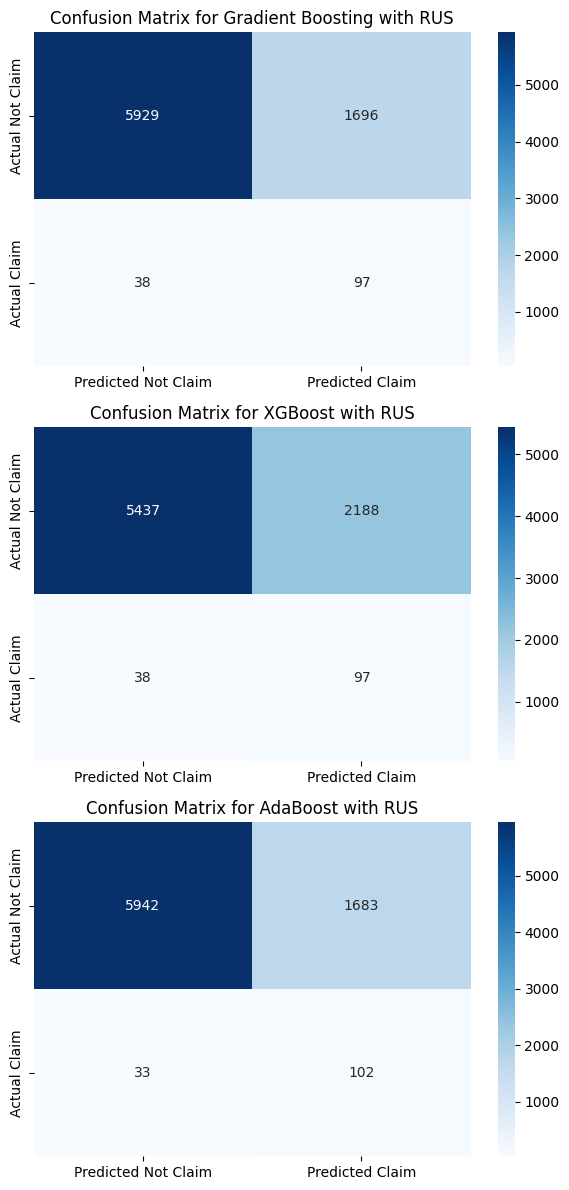

In [58]:
# Set up subplots
fig, axes = plt.subplots(len(models), len(resamples), figsize=(6,12))

# Flatten axes for easy indexing
axes = axes.flatten()

# Define labels for axis
labels = ['Predicted Not Claim', 'Predicted Claim']
index_labels = ['Actual Not Claim', 'Actual Claim']

# Iterate over both models and resampling methods
for idx, (name_model, model) in enumerate(models):
    for jdx, (name_resample, _) in enumerate(resamples):
        model_name = f"{name_model} with {name_resample}"
        sns.heatmap(conf_matrix[idx * len(resamples) + jdx], annot=True, fmt='d', cmap='Blues', ax=axes[idx * len(resamples) + jdx])
        axes[idx * len(resamples) + jdx].set_title(f"Confusion Matrix for {model_name}")
        axes[idx].set_xticks([0.5, 1.5])
        axes[idx].set_xticklabels(labels)
        axes[idx].set_yticks([0.5, 1.5])
        axes[idx].set_yticklabels(index_labels)

# Adjust layout
plt.tight_layout()
plt.show()

#### **AdaBoost with RUS**

In [59]:
# Define Hyperparameter space 
hyperparam_space = {
    'classifier__n_estimators': [1, 5, 10, 20, 25, 30, 40, 50, 100, 150, 200, 250, 300],  
    'classifier__learning_rate': [0.001, 0.01, 0.1, 1.0],  
    'classifier__algorithm': ['SAMME', 'SAMME.R'],
    'classifier__random_state': [1, 2, 4, 6, 8, 10, 12, 24, 42]
}

ada = AdaBoostClassifier()

pipe_model_1 = ImbPipeline(steps=[
    ('prep', preprocessor),
    ('resampler', random_under_sampler),  # Menggunakan Near Miss sebagai resampler
    ('classifier', ada)])  # Menggunakan XGBoost sebagai model

In [60]:
# Define the grid search
gridsearch_ada = GridSearchCV(
    estimator=pipe_model_1,
    param_grid=hyperparam_space,  # Hyperparameter space
    cv=StratifiedKFold(n_splits=5),  # Cross-validation scheme 
    scoring='recall',   # Evaluation metrics
    n_jobs=-1   # To speed up the process by utilizing multiple cores of the machine
)

gridsearch_ada.fit(X_train, y_train)

c:\Users\Atik Dharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('binary_encoder',
                                                                         BinaryEncoder(),
                                                                         ['Agency',
                                                                          'Product '
                                                                          'Name',
                                                                          'Destination']),
                                                                        ('one_hot_encoder',
                                                                         OneHotEncoder(),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Channel']),
                                                                        ('ordinal_encoder',
                                                                         OrdinalEncoder(categories=[['Babies'...
                                                                          'value)'])])),
                                       ('resampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__algorithm': ['SAMME', 'SAMME.R'],
                         'classifier__learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'classifier__n_estimators': [1, 5, 10, 20, 25, 30, 40,
                                                      50, 100, 150, 200, 250,
                                                      300],
                         'classifier__random_state': [1, 2, 4, 6, 8, 10, 12, 24,
                                                      42]},
             scoring='recall')

In [61]:
# Show the chosen parameters by the Grid Search and its Train score
print('Best Hyperparameters: ', gridsearch_ada.best_params_)
print('Best Score: ', gridsearch_ada.best_score_) 

Best Hyperparameters:  {'classifier__algorithm': 'SAMME.R', 'classifier__learning_rate': 1.0, 'classifier__n_estimators': 50, 'classifier__random_state': 1}
Best Score:  0.7249913464866735


In [62]:
# Getting the best model from grid search
best_model_ada = gridsearch_ada.best_estimator_

# Assigning the best model grid search
ada_tuning = gridsearch_ada.best_estimator_
ada_tuning.fit(X_train, y_train)

c:\Users\Atik Dharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('binary_encoder',
                                                  BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('ordinal_encoder',
                                                  OrdinalEncoder(categories=[['Babies',
                                                                              'Children',
                                                                              'Teenager',
                                                                              'Young '
                                                                              'Adult',
                                                                              'Adult',
                                                                              'Senior '
                                                                              'Aged'],
                                                                             ['1-4 '
                                                                              'months',
                                                                              '5-8 '
                                                                              'months',
                                                                              '9-12 '
                                                                              'months',
                                                                              '>12 '
                                                                              'months']]),
                                                  ['Age Range',
                                                   'Duration Category']),
                                                 ('robust_scaler',
                                                  RobustScaler(),
                                                  ['Net Sales',
                                                   'Commision (in value)'])])),
                ('resampler', RandomUnderSampler(random_state=42)),
                ('classifier', AdaBoostClassifier(random_state=1))])

In [63]:
# Predict the test set using the best found model during grid search
y_pred_ada_tuning = ada_tuning.predict(X_test)

accuracy_ada_tuning = accuracy_score(y_test, y_pred_ada_tuning) * 100
precision_ada_tuning = precision_score(y_test, y_pred_ada_tuning) * 100
recall_ada_tuning = recall_score(y_test, y_pred_ada_tuning) * 100
f1_ada_tuning = f1_score(y_test, y_pred_ada_tuning) * 100

ada_after_tuning = pd.DataFrame({'Recall': recall_ada_tuning,
                                 'Accuracy': accuracy_ada_tuning,
                                 'Precision': precision_ada_tuning,
                                 'F1': f1_ada_tuning}, index=['AdaBoost with RUS after Tuning'])

# Display the metrics for the Grid Search
metrics_df_tune_ada = metrics_df.rename(index={'AdaBoost with RUS': 'AdaBoost with RUS before Tuning'})
metrics_df_tune_ada = metrics_df_tune_ada.loc[['AdaBoost with RUS before Tuning']]
metrics_df_tune_ada = pd.concat([ada_after_tuning, metrics_df_tune_ada])
metrics_df_tune_ada

,Recall,Accuracy,Precision,F1
AdaBoost with RUS after Tuning,75.555556,77.886598,5.714286,10.625
AdaBoost with RUS before Tuning,75.555556,77.886598,5.714286,10.625


#### **Gradient Booster with RUS**

In [64]:
# Define Hyperparameter space for Gradient Boosting
hyperparam_space_gb = {
    'classifier__n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],  
    'classifier__learning_rate': [0.001, 0.01, 0.1, 1.0],  
    'classifier__max_depth': [3, 5, 7, 9],  
    'classifier__random_state': [1, 42, 2020, 2024]
}

gb = GradientBoostingClassifier()

In [65]:
pipe_model_gb = ImbPipeline(steps=[
    ('prep', preprocessor),
    ('resampler', random_under_sampler),  
    ('classifier', gb)])

# Define the grid search for Gradient Boosting
gridsearch_gb = GridSearchCV(
    estimator=pipe_model_gb,
    param_grid=hyperparam_space_gb,  
    cv=StratifiedKFold(n_splits=5),  
    scoring='recall',   
    n_jobs=-1   
)

gridsearch_gb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('binary_encoder',
                                                                         BinaryEncoder(),
                                                                         ['Agency',
                                                                          'Product '
                                                                          'Name',
                                                                          'Destination']),
                                                                        ('one_hot_encoder',
                                                                         OneHotEncoder(),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Channel']),
                                                                        ('ordinal_encoder',
                                                                         OrdinalEncoder(categories=[['Babies'...
                                                                          '(in '
                                                                          'value)'])])),
                                       ('resampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'classifier__max_depth': [3, 5, 7, 9],
                         'classifier__n_estimators': [50, 100, 150, 200, 250,
                                                      300, 350, 400, 450, 500],
                         'classifier__random_state': [1, 42, 2020, 2024]},
             scoring='recall')

In [66]:
# Show the chosen parameters by the Grid Search and its Train score for Gradient Boosting
print('Best Hyperparameters (Gradient Boosting): ', gridsearch_gb.best_params_)
print('Best Score (Gradient Boosting): ', gridsearch_gb.best_score_)

Best Hyperparameters (Gradient Boosting):  {'classifier__learning_rate': 0.001, 'classifier__max_depth': 5, 'classifier__n_estimators': 250, 'classifier__random_state': 1}
Best Score (Gradient Boosting):  0.7509518864659052


In [67]:
# Getting the best model from grid search for Gradient Boosting
best_model_gb = gridsearch_gb.best_estimator_

# Assigning the best model grid search for Gradient Boosting
gb_tuning = gridsearch_gb.best_estimator_
gb_tuning.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('binary_encoder',
                                                  BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('ordinal_encoder',
                                                  OrdinalEncoder(categories=[['Babies',
                                                                              'Children',
                                                                              'Teenager',
                                                                              'Young '
                                                                              'Adult',
                                                                              'Adult',
                                                                              'Senior '
                                                                              'Aged'],
                                                                             ['1-4 '
                                                                              'months',
                                                                              '5-8 '
                                                                              'months',
                                                                              '9-12 '
                                                                              'months',
                                                                              '>12 '
                                                                              'months']]),
                                                  ['Age Range',
                                                   'Duration Category']),
                                                 ('robust_scaler',
                                                  RobustScaler(),
                                                  ['Net Sales',
                                                   'Commision (in value)'])])),
                ('resampler', RandomUnderSampler(random_state=42)),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.001, max_depth=5,
                                            n_estimators=250,
                                            random_state=1))])

In [68]:
# Predict the test set using the best found model during grid search for Gradient Boosting
y_pred_gb_tuning = gb_tuning.predict(X_test)

accuracy_gb_tuning = accuracy_score(y_test, y_pred_gb_tuning) * 100
precision_gb_tuning = precision_score(y_test, y_pred_gb_tuning) * 100
recall_gb_tuning = recall_score(y_test, y_pred_gb_tuning) * 100
f1_gb_tuning = f1_score(y_test, y_pred_gb_tuning) * 100

gb_after_tuning = pd.DataFrame({'Recall': recall_gb_tuning,
                                'Accuracy': accuracy_gb_tuning,
                                'Precision': precision_gb_tuning,
                                'F1': f1_gb_tuning}, index=['Gradient Boosting with RUS after Tuning'])

# Display the metrics for the Grid Search for Gradient Boosting
metrics_df_tune_gb = metrics_df.rename(index={'Gradient Boosting with RUS': 'Gradient Boosting with RUS before Tuning'})
metrics_df_tune_gb = metrics_df_tune_gb.loc[['Gradient Boosting with RUS before Tuning']]
metrics_df_tune_gb = pd.concat([gb_after_tuning, metrics_df_tune_gb])
metrics_df_tune_gb

,Recall,Accuracy,Precision,F1
Gradient Boosting with RUS after Tuning,75.555556,74.884021,5.054509,9.475151
Gradient Boosting with RUS before Tuning,71.851852,77.654639,5.409927,10.062241


#### **XGBoost with RUS**

In [69]:
# Define Hyperparameter space for XGBoost
hyperparam_space_xgb = {
    'classifier__n_estimators': [50, 100, 150, 200, 250, 300],  
    'classifier__learning_rate': [0.001, 0.01, 0.1, 1.0],  
    'classifier__max_depth': [3, 5, 7, 9],
    'classifier__random_state': [1, 42, 2020, 2024]
}

xgb = XGBClassifier()

pipe_model_xgb = ImbPipeline(steps=[
    ('prep', preprocessor),
    ('resampler', random_under_sampler),  
    ('classifier', xgb)])

In [70]:
# Define the grid search for XGBoost
gridsearch_xgb = GridSearchCV(
    estimator=pipe_model_xgb,
    param_grid=hyperparam_space_xgb,  
    cv=StratifiedKFold(n_splits=5),  
    scoring='recall',   
    n_jobs=-1   
)

gridsearch_xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('binary_encoder',
                                                                         BinaryEncoder(),
                                                                         ['Agency',
                                                                          'Product '
                                                                          'Name',
                                                                          'Destination']),
                                                                        ('one_hot_encoder',
                                                                         OneHotEncoder(),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Channel']),
                                                                        ('ordinal_encoder',
                                                                         OrdinalEncoder(categories=[['Babies'...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'classifier__max_depth': [3, 5, 7, 9],
                         'classifier__n_estimators': [50, 100, 150, 200, 250,
                                                      300],
                         'classifier__random_state': [1, 42, 2020, 2024]},
             scoring='recall')

In [71]:
# Show the chosen parameters by the Grid Search and its Train score for XGBoost
print('Best Hyperparameters (XGBoost): ', gridsearch_xgb.best_params_)
print('Best Score (XGBoost): ', gridsearch_xgb.best_score_)

Best Hyperparameters (XGBoost):  {'classifier__learning_rate': 1.0, 'classifier__max_depth': 3, 'classifier__n_estimators': 50, 'classifier__random_state': 1}
Best Score (XGBoost):  0.741675320179993


In [72]:
# Getting the best model from grid search for XGBoost
best_model_xgb = gridsearch_xgb.best_estimator_

# Assigning the best model grid search for XGBoost
xgb_tuning = gridsearch_xgb.best_estimator_
xgb_tuning.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('binary_encoder',
                                                  BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('ordinal_encoder',
                                                  OrdinalEncoder(categories=[['Babies',
                                                                              'Children',
                                                                              'Teenager',
                                                                              'Young '
                                                                              'Adult',
                                                                              'Adult',
                                                                              'Senior '
                                                                              'Aged'],
                                                                             ['1-4 '
                                                                              'months',
                                                                              '5-8 '
                                                                              'months',
                                                                              '...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=1.0,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_jobs=None,
                               num_parallel_tree=None, random_state=1, ...))])

In [73]:
# Predict the test set using the best found model during grid search for XGBoost
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

accuracy_xgb_tuning = accuracy_score(y_test, y_pred_xgb_tuning) * 100
precision_xgb_tuning = precision_score(y_test, y_pred_xgb_tuning) * 100
recall_xgb_tuning = recall_score(y_test, y_pred_xgb_tuning) * 100
f1_xgb_tuning = f1_score(y_test, y_pred_xgb_tuning) * 100

xgb_after_tuning = pd.DataFrame({'Recall': recall_xgb_tuning,
                                 'Accuracy': accuracy_xgb_tuning,
                                 'Precision': precision_xgb_tuning,
                                 'F1': f1_xgb_tuning}, index=['XGBoost with RUS after Tuning'])

# Display the metrics for the Grid Search for XGBoost
metrics_df_tune_xgb = metrics_df.rename(index={'XGBoost with RUS': 'XGBoost with RUS before Tuning'})
metrics_df_tune_xgb = metrics_df_tune_xgb.loc[['XGBoost with RUS before Tuning']]
metrics_df_tune_xgb = pd.concat([xgb_after_tuning, metrics_df_tune_xgb])
metrics_df_tune_xgb

,Recall,Accuracy,Precision,F1
XGBoost with RUS after Tuning,71.851852,72.860825,4.480370,8.434783
XGBoost with RUS before Tuning,71.851852,71.314433,4.245077,8.016529


#### **Confusion Matrix of 3 Best Model After Tuning**

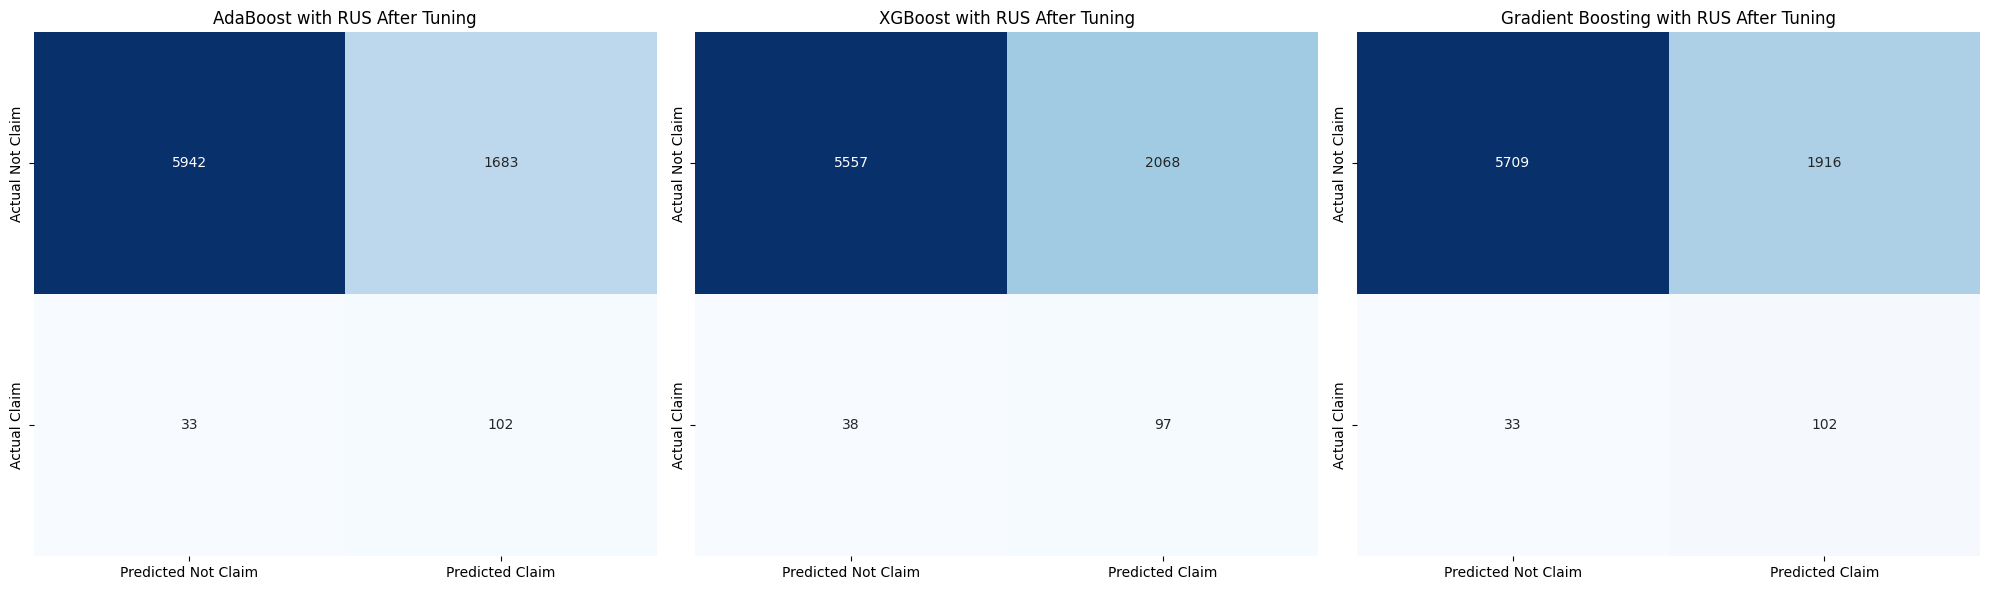

In [74]:
# Define model names, predictions, and titles
models = ['AdaBoost with RUS', 'XGBoost with RUS', 'Gradient Boosting with RUS']
predictions = [y_pred_ada_tuning, y_pred_xgb_tuning, y_pred_gb_tuning]
titles = ['After Tuning', 'After Tuning', 'After Tuning']

# Define labels for axis
labels = ['Predicted Not Claim', 'Predicted Claim']
index_labels = ['Actual Not Claim', 'Actual Claim']

# Set up subplot
fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(20, 6))

# Plot confusion matrices using loop
for ax, model, prediction, title in zip(axes, models, predictions, titles):
    cm = confusion_matrix(y_test, prediction)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'{model} {title}')
    ax.set_xticks([0.5, 1.5])
    ax.set_xticklabels(labels)
    ax.set_yticks([0.5, 1.5])
    ax.set_yticklabels(index_labels)

plt.tight_layout()
plt.show()

#### **Comparison of Hyperparameter Tuning Result**

In [75]:
pd.concat([metrics_df_tune_ada, metrics_df_tune_gb, metrics_df_tune_xgb])

,Recall,Accuracy,Precision,F1
AdaBoost with RUS after Tuning,75.555556,77.886598,5.714286,10.625000
AdaBoost with RUS before Tuning,75.555556,77.886598,5.714286,10.625000
Gradient Boosting with RUS after Tuning,75.555556,74.884021,5.054509,9.475151
Gradient Boosting with RUS before Tuning,71.851852,77.654639,5.409927,10.062241
XGBoost with RUS after Tuning,71.851852,72.860825,4.480370,8.434783
XGBoost with RUS before Tuning,71.851852,71.314433,4.245077,8.016529


### **The Final Model**

Berdasarkan hasil analisia tersebut AdaBoost Classifier dengan menggunakan Random Under Resampler, menunjukkan recall sebesar 75,56% sebelum dan sesudah Tuning. Hasil ini menunjukkan bahwa model tersebut efektif dalam mengidentifikasi True Positive.

#### **Feature Importance Analysis**

C:\Users\Atik Dharma\AppData\Local\Temp\ipykernel_19940\3119670962.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis')


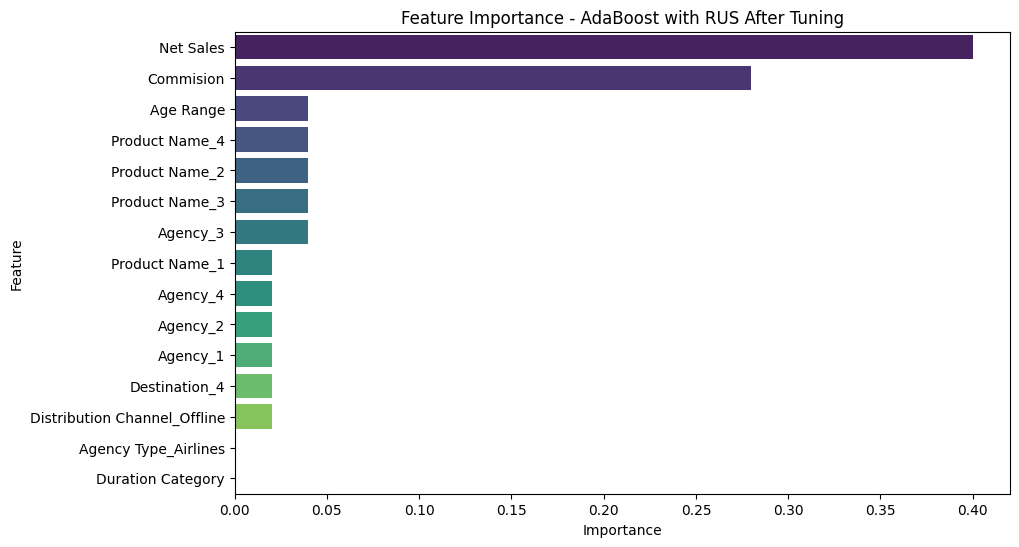

,Feature,Importance
24,Net Sales,0.40
25,Commision,0.28
22,Age Range,0.04
9,Product Name_4,0.04
7,Product Name_2,0.04
8,Product Name_3,0.04
3,Agency_3,0.04
6,Product Name_1,0.02
4,Agency_4,0.02
2,Agency_2,0.02


In [77]:
# Extracting feature importance from the best AdaBoostClassifier model
feature_importance_ada = best_model_ada.named_steps['classifier'].feature_importances_

# Access the transformers within the preprocessor
binary_encoder = preprocessor.named_transformers_['binary_encoder']
one_hot_encoder = preprocessor.named_transformers_['one_hot_encoder']

# Get the column names after encoding
binary_encoder_cols = list(binary_encoder.get_feature_names_out(binary_cols))
one_hot_encoder_cols = list(one_hot_encoder.get_feature_names_out(one_hot_cols))
ordinal_encoder_cols = ordinal_cols

# Combine column names from all transformers
preprocessor_columns = binary_encoder_cols + one_hot_encoder_cols + ordinal_encoder_cols + ['Net Sales', 'Commision']

# Creating a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': preprocessor_columns, 'Importance': feature_importance_ada})

# Sorting the DataFrame by feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis')
plt.title('Feature Importance - AdaBoost with RUS After Tuning')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

display(feature_importance_df.head(15))

The provided table appears to list the feature importance scores for various features in a predictive model. Here's an interpretation and analysis of the feature importance:

**Feature Importance Analysis:**

1. **Net Sales (0.40)**:
   - This feature has the highest importance score, indicating that it has the most significant impact on the model's predictions. A higher value of net sales suggests a stronger correlation with the target variable.

2. **Commision (0.28)**:
   - The commission feature has the second-highest importance score, suggesting it also plays a crucial role in the model's predictions. It indicates that the commission amount has a considerable influence on the target variable.

3. **Age Range (0.04)**:
   - Age range has a lower importance score compared to net sales and commission. However, it still contributes to the model's predictions, albeit to a lesser extent.

4. **Product Name and Agency Features (0.02 - 0.04)**:
   - Features related to product name and agency have relatively lower importance scores compared to net sales and commission. This suggests that while these features contribute to the model's predictions, their impact is not as significant as net sales and commission.

5. **Distribution Channel (0.02)**:
   - The distribution channel feature also has a lower importance score, indicating its relatively minor contribution to the model's predictions compared to net sales and commission.

6. **Destination (0.02)**:
   - Destination features have importance scores of 0.02, suggesting they have a minimal impact on the model's predictions compared to other features like net sales and commission.

**Overall Analysis:**
- Net sales and commission are the most influential features in the model, indicating that they are strong predictors of the target variable.
- Age range, product name, agency, distribution channel, and destination features also contribute to the model's predictions, but to a lesser extent.
- Understanding feature importance helps in identifying key drivers of the target variable and can guide feature selection, model interpretation, and potentially, feature engineering efforts.

#### **Confusion Matrix Analysis**

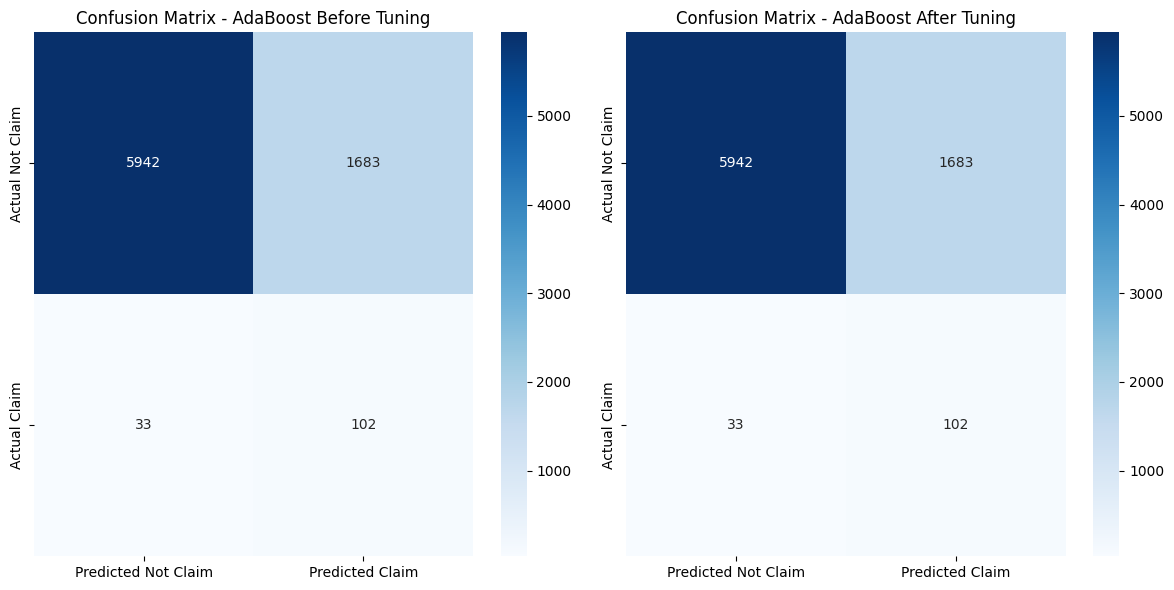

In [78]:
# Display the confusion matrix for Logistic Regression after tuning
conf_matrix_tuned = confusion_matrix(y_test, y_pred_ada_tuning)

# Define the models and confusion matrices
ada_conf_matrices = [conf_matrix[2], conf_matrix_tuned]

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Define labels for axis
labels = ['Predicted Not Claim', 'Predicted Claim']
index_labels = ['Actual Not Claim', 'Actual Claim']

# Plot the first confusion matrix (before tuning)
sns.heatmap(ada_conf_matrices[0], annot=True, cmap='Blues', fmt='d', ax=axes[0])
axes[0].set_title('Confusion Matrix - AdaBoost Before Tuning')
axes[0].set_xticklabels(labels)
axes[0].set_yticklabels(index_labels)

# Plot the second confusion matrix (after tuning)
sns.heatmap(ada_conf_matrices[1], annot=True, cmap='Blues', fmt='d', ax=axes[1])
axes[1].set_title('Confusion Matrix - AdaBoost After Tuning')
axes[1].set_xticklabels(labels)
axes[1].set_yticklabels(index_labels)

plt.tight_layout()
plt.show()

## **7. Conclusion & Recommendation**

*Conclusion:**

1. Model Performance improvement:
AdaBoost, dengan menggunakan teknik Random Under Resampler, menunjukkan peningkatan signifikan dalam recall score dari 0% menjadi 75,56%. Peningkatan ini menunjukkan efektivitas model dalam mengidentifikasi True positive
2. Hyperparameter Tuning Impact:
Meskipun melakukan hyperparameter tunning, metriknya tidak berubah.
3. Feature Importance Analysis
Net sales dan commision muncul sebagai fitur yang paling berpengaruh dalam memprediksi target variable. Memahami key driver ini dapat membantu dalam menyempurnakan model dan untuk proses pengambilan keputusan.


**Recommendation:**

1. Exploration of Modeling Techniques and Tuning:
- Bereksperimen dengan berbagai metode pemodelan, teknik resampling, dan hyperparameter tunning untuk meningkatkan kinerja model.
2. Continuous Monitoring and Updates:
- Memastikan melakukan monitoring dan update secara berkala atas kinerja model dengan data baru
3. Augmentation of Minority Class Data
- Memperkuat kinerja model dengan menambah data, terutama berfokus pada penambahan data untuk kelas minoritas yaitu data Target (Klaim).


## **Deployment**

In [79]:
# create pickle to save model as sav
import pickle
#sav file
filename = 'Claim Detector AdaBoost.pkl'
pickle.dump(ada_tuning, open(filename, 'wb'))